# Projeto 1 - Ciência dos Dados

Nome: Lorena Barbosa Antunes Da Silva

Nome: José Edson Mendonça Ribeiro Lima Araújo

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
### Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import emoji
import seaborn as sn
import nltk
import unidecode

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\José Edson Mendonça\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\2° Semestre\CDADOS\CDados_Projeto1


### Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
filename = 'Peaky Blinders.xlsx'

In [4]:
train = pd.read_excel(filename)
linha=np.arange(0,300,1)
train=train.iloc[linha,[0,1]]
train.head(5)

,Treinamento,Classificação
0,peaky fucking blinders foi a melhor coisa que ...,1.0
1,@limawt1 peaky blinders está vindo em breve!! ...,0.0
2,gente cancela ele me seguiu de outro instagram...,0.0
3,até eu que não sou fumante fico com vontade de...,0.0
4,tou a curtir bue de peaky blinders,1.0


In [5]:
test = pd.read_excel(filename, sheet_name = 'Teste')
linha=np.arange(0,200,1)
test=test.iloc[linha,[0,1]]
test.head(5)

,Teste,Classificação
0,em relação a esta coisa toda do possível novo ...,0.0
1,meu pai botou peaky blinders pra gente ver vo ...,1.0
2,@meltedvideos ele está parecendo um peaky blin...,0.0
3,o cara realmente lançou que viu umbrella acade...,0.0
4,que saudades que eu tava de assistir peaky bli...,1.0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

Neste CLASSIFICADOR AUTOMÁTICO DE SENTIMENTO, considera-se a relevância de tweets acerca da série Peaky Blinders. Tweets que apresentam mensagens com sentimentos e respostas relacionados à  série, são considerados como relevantes, sendo positivos ou negativos, elogios ou críticas sobre o enredo, além de menções de que estão assistindo ou que indicaram a série. 

Exemplo: "Não curti assistir Peaky Blinders", "@user1 vc precisa assistir peaky blinders", "acabei de maratonar essa serie peaky blinders".

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [45]:
from IPython.display import display
pd.options.display.max_rows = 13


import re 



def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    limpa=' '.join(emoji.get_emoji_regexp().split(text))
    punctuation = '[!-.:?;]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    
    limpa = re.sub("@[A-Za-z0-9_]+","", limpa)
    limpa = re.sub("#[A-Za-z0-9_]+","", limpa)
    limpa = unidecode.unidecode(limpa)
    limpa = re.sub(r"http\S+", "", limpa)
    text_subbed = re.sub(pattern, '', limpa)
    return text_subbed

### Funções a serem utilizadas

##### Remoção de preposições

In [131]:
nltk.download('stopwords')
preposicoes = nltk.corpus.stopwords.words('portuguese')
preposicoes.append('')

def funçao_stop_words(lista):
    sem_prep=[]     
    for palavra in lista: 
        if palavra in sem_prep: 
            continue
        else:
            sem_prep.append(palavra)
 
    return sem_prep

[nltk_data] Downloading package stopwords to C:\Users\José Edson
[nltk_data]     Mendonça\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Tornando as letras minúsculas

In [132]:
def lower(comentario):
    return comentario.lower()

##### Junção de elementos em String

In [133]:
def junta_elemento(lista):
    return ' '.join(lista)

##### Aplicação de contínua de funções anteriores

In [297]:
def aplicacao(comentario):
    retira_falhas=(cleanup(lower(comentario)))
    transcricao=separa_elemento(retira_falhas)
    c_limpo=junta_elemento(funçao_stop_words(transcricao))
    return c_limpo

##### Transformando lista em series

In [298]:
def cria_series(frases):
    frases += ''
    return pd.Series(separa_elemento(frases))    

##### Categorização de palavras

In [299]:

#Transformando palavras em variáveis categóricas:
train['Treinamento'] = train['Treinamento'].astype('category')
test['Teste'] = test['Teste'].astype('category')

# TREINAMENTO

##### Separação de comentários relevantes e irrelevantes

In [300]:
comentarios_relevantes=[]
comentarios_irrelevantes=[]
for i in range(0,300,1):
    comentario=cleanup(train.Treinamento[i]).lower().split()
    if train.Classificação[i]==1:
        comentarios_relevantes.append(comentario)
    elif train.Classificação[i]==0:
        comentarios_irrelevantes.append(comentario)


##### Remoção de @ e links dos tweets

In [301]:
l_irrelevantes=[]
l_relevantes=[]
for comentario in comentarios_irrelevantes:
    lista_remocao=[]
    for palavra in comentario:
        if  palavra[0]=='@' or 'htt' == palavra[0:3]:
            lista_remocao.append(palavra)
    for palavra in lista_remocao:
        comentario.remove(palavra)
    for palavra in comentario:
        l_irrelevantes.append(palavra)
        
for comentario in comentarios_relevantes:
    lista_remocao=[]
    for palavra in comentario:
        if  palavra[0]=='@' or 'htt' == palavra[0:3]:
            lista_remocao.append(palavra)
    for palavra in lista_remocao:
        comentario.remove(palavra)

for comentario in comentarios_irrelevantes:
    for palavra in comentario:
        l_irrelevantes.append(palavra)
for comentario in comentarios_relevantes:
    for palavra in comentario:
        l_relevantes.append(palavra)

# Separação de Tweets Relevantes, Irrelevantes e Totais

### Tweets Relevantes

##### Guardando em um pd.Series

In [302]:
s_l_relevantes=  pd.Series(l_relevantes)

##### Frequências Absolutas

In [303]:
tab_relevantes = s_l_relevantes.value_counts()

### Tweets Irrelevantes

##### Guardando em um pd.Series

In [304]:
s_l_irrelevantes=  pd.Series(l_irrelevantes)

##### Frequências Absolutas

In [305]:
tab_irrelevantes = s_l_irrelevantes.value_counts()

### Tweets Totais

##### Acumulação de comentários relevantes e irrelevantes em uma mesma lista

In [306]:
total = comentarios_relevantes + comentarios_irrelevantes
lista_total = l_irrelevantes + l_relevantes

##### Guardando em pd.Series e Verificando a Frequencia Absoluta de todas as palavras em relação aos dois conjuntos somados

In [307]:
s_l_total = pd.Series(lista_total)
tab_l_total= s_l_total.value_counts()

# Probabilidades

#Lorena

In [308]:
P_relevante = len(l_relevantes)/len(lista_total)
P_irrelevante = len(l_irrelevantes)/len(lista_total)
P_relevante + P_irrelevante

1.0

# Funções para Realização dde Suavização de Laplace

##### Frequência Absoluta na  base de dados.

In [309]:
def frequencia_absoluta(palavra,dados_freq_abs):
    
    try:
        return dados_freq_abs[palavra]
    except:
        return 0

### Aplicação da Suavização de Laplace

In [ ]:
#Lorena

In [310]:
def laplace(freq_abs,palavras_por_relevancia):
    return(freq_abs+1)/(len(palavras_por_relevancia)+len(lista_total))

##### Cálculo de probabilidade para um tweet dado como relevante ser classificado como tal

In [311]:
def P_comentario_dado_rel(coment):
  
    P_comentario_dado_relevante=1
    separa_coment=coment.split(',')
    for palavra in separa_coment:
        freq_abs=frequencia_absoluta(palavra,tab_relevantes)
        prob_palavra=laplace(freq_abs,l_relevantes)
        P_comentario_dado_relevante*=prob_palavra
    return P_comentario_dado_relevante

##### Cálculo de probabilidade para um tweet dado como irrelevante ser classificado como tal

In [312]:
def P_comentario_dado_irrel(coment):
   
    P_comentario_dado_irrelevante=1
    separa_coment=coment.split(',')
    for palavra in separa_coment:
        freq_abs=frequencia_absoluta(palavra,tab_irrelevantes)
        prob_palavra=laplace(freq_abs,l_irrelevantes)
        P_comentario_dado_irrelevante*=prob_palavra
    return P_comentario_dado_irrelevante

### Aplicação do Algoritmo de Naive Bayes

In [ ]:
#LOrena

In [313]:
def NB (comentario):
    relevancia_classificador=[]
    if  P_comentario_dado_rel(comentario)*P_relevante >P_comentario_dado_irrel(comentario)*P_irrelevante:
        print(P_comentario_dado_rel(comentario)*P_relevante)
        print(P_comentario_dado_irrel(comentario)*P_irrelevante)
        relevancia_classificador.append(1)
        return 1
    else:
        relevancia_classificador.append(0)
        return 0

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

# TESTE

In [395]:
test_relevantes=[]
test_irrelevantes=[]
test_total = []

for i in range(0,200,1):
    comentarios_test=cleanup(test.Teste[i]).lower().split()
    
    if test.Classificação[i]==1:
        test_relevantes.append(comentarios_test)

    elif test.Classificação[i]==0:
        test_irrelevantes.append(comentarios_test)

    

In [400]:
l_test_irrelevantes=[]
l_test_relevantes=[]
for comentario in test_irrelevantes:
    lista_remocao=[]
    for palavra in comentario:
        if  palavra[0]=='@' or 'htt' == palavra[0:3]:
            lista_remocao.append(palavra)
    for palavra in lista_remocao:
        comentario.remove(palavra)
    for palavra in comentario:
        l_test_irrelevantes.append(palavra)
        
for comentario in test_relevantes:
    lista_remocao=[]
    for palavra in comentario:
        if  palavra[0]=='@' or 'htt' == palavra[0:3]:
            lista_remocao.append(palavra)
    for palavra in lista_remocao:
        comentario.remove(palavra)

for comentario in test_irrelevantes:
    for palavra in comentario:
        l_test_irrelevantes.append(palavra)
for comentario in test_relevantes:
    for palavra in comentario:
        l_test_relevantes.append(palavra)

In [ ]:
test_total =l_test_relevantes+l_test_irrelevantes

### CONCLUINDO

### Adição de uma nova coluna no Data Frame

In [ ]:
test["Relevancia_Classificador"]=relevancia_classificador

### Matriz de Confusão 

Buscando uma visualização melhor, plota-se uma matriz de confusão por meio de uma tabelza cruzada.

In [402]:
Matriz_de_Comparação = pd.crosstab(test["Classificação"] , test["Relevancia_Classificador"], normalize=True)*100

false_p = Matriz_de_Comparação[1][0]
true_p = Matriz_de_Comparação[1][1]
fake_n = Matriz_de_Comparação[0][1]
true_n = Matriz_de_Comparação[0][0]

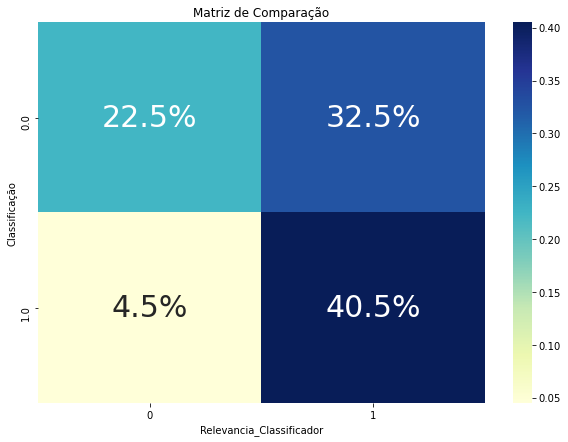

In [401]:
Matriz_de_Comparação
plt.figure(figsize=(10,7))
plt.title('Matriz de Comparação')
sn.heatmap(Matriz_de_Comparação/100, annot=True, annot_kws={"size": 30}, fmt='.1%', cmap='YlGnBu')
plt.show()

##### Informações sobre falsos (positivo e negativo) e verdadeiros(positivos e negativos)

In [398]:
print("O percentual de falsos positivo foi de :{0:.2f}%".format(false_p))
print("O percentual de verdadeiros positivo foi de :{0:.2f}%".format(true_p))
print("O percentual de falsos negativo foi de :{0:.2f}%".format(fake_n))
print("O percentual de verdadeiros negativo foi de :{0:.2f}%".format(true_n))

O percentual de falsos positivo foi de :32.50%
O percentual de verdadeiros positivo foi de :40.50%
O percentual de falsos negativo foi de :4.50%
O percentual de verdadeiros negativo foi de :22.50%


##### Demonstração da Acurácia do Classificador

A acurácia é representada pela soma dos percentuais de verdadeiros(positivos e negativos)

In [399]:
print("A acurácia do classificador foi de:{0:.2f}%".format(Matriz_de_Comparação[0][0] + Matriz_de_Comparação[1][1]))

A acurácia do classificador foi de:63.00%


Nosso classificador teve uma **acurácia de 63,00%**, o que significa que ele classifica de forma adequada **63,00%** dos tweets analisados.
* Observou-se um percentual de **42,00% verdadeiros positivos**, ou seja, aproximadamente **42,00%** dos comentários relevantes foram corretamente classificados como relevantes. 
* Observou-se um percentual de **34,50% falsos positivos**, ou seja, aproximadamente **34,50%** dos comentários irrelevantes foram incorretamente classificados como relevantes. 
* Observou-se um percentual de **20,50% verdadeiros negativos**, ou seja, aproximadamente **20,50%** dos comentários irrelevantes foram corretamente classificados como irrelevantes. 
* Observou-se um percentual de **3,00% falsos negativos**, ou seja, aproximadamente **3,00%** dos comentários relevantes foram incorretamente classificados como irrelevantes. 

##### Sarcasmo e dupla negação

Neste projeto, com o classificador Naïve-Bayes, assumiu-se a independência entre as palavras, considerando-se apenas a probabilidade destas de aparecerem em determinada categoria. Ou seja, o classificador não leva em consideração as relações entre palavras e a sintaxe da língua portuguesa. O que pode levar à uma classificação errônea de frases sarcásticas, ou com dupla negação.

In [381]:
frase_sarcastica = "Peaky Binders é tão bom quanto tomar chuva"
if NB(aplicacao(frase_sarcastica))==1:
    print(frase_sarcastica)
    print('A Frase é classificada como Relevante')
if NB(aplicacao(frase_sarcastica))==0:
    print(frase_sarcastica)
    print('A Frase é classificada como Irrelevante')

Peaky Binders é tão bom quanto tomar chuva
A Frase é classificada como Irrelevante


In [382]:
frase_duplanegacao = "Eu nunca não vou assistir Peaky Blinders"
if NB(frase_duplanegacao)==1:
    print('A Frase é classificada como Relevante')
if NB(frase_duplanegacao)==0:
    print(frase_duplanegacao)
    print('A Frase é classificada como Irrelevante')

Eu nunca não vou assistir Peaky Blinders
A Frase é classificada como Irrelevante


##### Plano de Expansão

Tendo em considereção que o projeto já apresentou 63,0% de acurácia. Para que o classificador fosse mais preciso poder-se-iam fazer futuras iterações que justificariam um maior investimento no projeto, como uma limpeza adicional dos tweets obtidos; levar em conta a sintaxe e organização entre palavras da língua portuguesa, ou seja, não admitir que as palavras têm probabilidade de aparecer em uma frase independentemente.
Ademais, acrescenta-se que existe necessidade de melhorias para atender melhor o perfil de cada empresa, dado que saber o que cada área busca, pode facilitar a classificação. Por exemplo, a área de cinema e audiovisual desejasaber como está o sentimento com base em determinado personagem, ou determinado episódio, esse tipo de especificação pode aumentar a acurácia do modelo.

### Por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets?

Explica-se que a utilização da ase de treinamento para uso automático do próprio classificador não é benéfico para a classificação, dado que o classificador toma a base de Treinamento como uma fonte de classificação, isso determinaria um enviesamento para a classificação, o que não faz parte do objetivo do projeto. Seria a comparação de um exemplo com ele próprio.

Além disso, ocorre que a base de dados sofre um efeito denominado Overfitting devido ao treinamento não ser suficiente para gerar classificações mais acertivas quando o sistema recebe novos tweets. Ou seja, apesar de ocorrer uma alta acurácia, a generalização é baixa, afetando a veracidade das classificações.

### Diferentes cenários de uso para o classificador Naive-Bayes

##### 1) Análises de Fraude
Análise das contas enviadas pelo funcionário solicitando reembolso de despesas de alimentação, transporte, etc. Com esse banco de dados, a empresa pode prever a probabilidade de fraude.
O estudo traz com exemplos, ideias de possíveis fraudes quepoderiam ser utilizadas para fraudar o sistema bancário. Além disso, acrescenta com possíveis liberações de crédito para os clientes, se baseando nos dados referentes ao cliente.

FONTE: https://www.dataversity.net/what-is-naive-bayes-classification-and-how-is-it-used-for-enterprise-analysis/#

##### 2) Diagnóstico de Doenças
O método pode ser aplicado em diagnóstico de doenças, como é mostrado na postagem, dado que ao realizarem os testes, coletas e análises, os setores de saúde passam a ter dados referente ao paciente.
Com a tubulação dos dados, os membros de saúde podem avaliar a realidade de determinado resultado, como é tratado no exemplo: "Se um pessoa realizar um teste e receber um positivo, qual a probabilidade dela realmente estar doente?"
Com essa perspectiva, a área da saúde vem se conectando cada vez mais com a Ciência de Dados, buscando probabilidades para a saúde dos pacientes, visando prevenções econômicas, físicas e mentais.

FONTE: https://www.datageeks.com.br/naive-bayes/

##### 3) Previsão do Tempo 
O artigo está relacionado a utilização de dados metereológics para entender determinadas situações. Comenta-se que a ocorrência de partidas esportivas estão diretamente relacionametas ao clima/tempo que do momento da ocorrência. O artigo relaciona temperatura, umidade,vent, etc. à realização de uma partida de golf. Logo, os analistas conferem se as condições climáticas estão favoráveis para a ocorrência. O artigo apresenta uma das muitas relações que o esporte vem desenvolvendo com a tecnologia. A utilização de dados para melhorar o momento das disputas, diminui o número de acidentes, melhora o show que cerca cada partida, além de beneficiar os clientes que conseguirão ter uma melhor participação nos eventos.

FONTE:https://www.geeksforgeeks.org/naive-bayes-classifiers/

### Sugestões de melhorias


##### 1) SARCASMO E DUPLA NEGAÇÃO
Permitir por meio de código que o classificador note a presença de sarcasmo e dupla negação, pois principalmente, em redes sociais, o uso é comum e passa despercebido pelo classificador, ocorrendo classificações errôneas, alterando a acurácia do modelo.

##### 2) AUMENTO DO TAMANHO DO DATA FRAME PARA TREINAMENTO
O aumento da base de treinamento permite que o classificador tenha acesso a uma fonte maior de dados. Assim, a a alimentação cada vez maior, permite um aumento considerável na acurácia do classificador.

##### 3) ADIÇÃO DE CLASSIFICAÇÕES INTERMEDIÁRIAS
Considera-se que estão sendo realizadas somente duas classificações(relevante(1) e irrelevante(0)). Com a adição de novas classificações, poderiamos entender melhor os tweets com base nas probabilidades. Divisões como: irrelevante, pouco irrelevante, neutro, relevante, muito relevante.

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste


Nesse momento, serão juntados os 500 tweets e 
hospedados em um novo dataframe.Com a concatenação, aplica-se a limpeza do dataframe.
Após isso, os tweets serão divididos aleatoriamente pela
função "train_test_split" da biblioteca sklearn.model_selection,adotando uma proporção de 30%, o que representa uma semelhança à distribuição feita no início do projeto (200/300). 
Essa divisão aleatória permite que os dataframes 

In [437]:
from sklearn.model_selection import train_test_split
repeticoes=100
l_histograma=[]
while repeticoes!=0:
    
    test_split = pd.read_excel(filename, sheet_name = 'Teste').rename(columns={'Teste':'Total'})
    train_split = pd.read_excel(filename, sheet_name = 'Treinamento').rename(columns={'Treinamento':'Total'})

    #Concatenando
    base_total = pd.concat([train_split,test_split])
    #Limpando os tweets
    base_total['Relevância']=base_total['Total'].apply(aplicacao)
    base_total.head()
    X_train, X_test, y_train, y_test = train_test_split(base_total[['Relevância','Classificação']],base_total.Classificação,test_size=0.3)
 
    train_rel_new = X_train[X_train['Classificação']==1]
    train_irrel_new = X_train[X_train['Classificação']==0]
    comentarios_rel = (train_rel_new['Relevância'])
    comentarios_irrel = (train_irrel_new['Relevância'])
    comentarios=comentarios_rel+comentarios_irrel

    # Gera duas listas com as palavras relevantes e irrelevantes e gera uma lista total
    lista_rel = list(comentarios_rel)
    lista_irrel = list(comentarios_irrel)
    lista_total = lista_rel + lista_irrel
    lista_total_sem_repeticao = list(set(lista_total))
    total = pd.Series(lista_palavras)

    # Frequencias absolutas
    freq_palavras_relevantes_abs = comentarios_rel.value_counts()
    freq_palavras_irrelevantes_abs = comentarios_irrel.value_counts()
    freq_palavras_total_abs = comentarios.value_counts()

    P_Relevantes = len(lista_rel) / len(total)
    
    # Por complementar, temos P_Rc
    P_Irrelevantes = len(lista_irrel) / len(total)
    

    round(P_Relevantes,2)+round(P_Irrelevantes,2)==1

    X_test['Classificador'] = X_test['Relevância'].apply(NB)

    verdadeiros_pos = X_test.loc[(X_test['Classificador'] == 1) & (X_test['Classificação'] == 1),:].shape[0]
    verdadeiros_neg = X_test.loc[(X_test['Classificador'] == 0) & (X_test['Classificação'] == 0),:].shape[0]
    acuracia = (verdadeiros_pos + verdadeiros_neg)/X_test.shape[0]
    l_histograma.append(acuracia * 100)

    repeticoes-=1

## Histograma para análise de frequência de acurácia nas 100 tentativas de classificação e redistribuição do DataFrame.

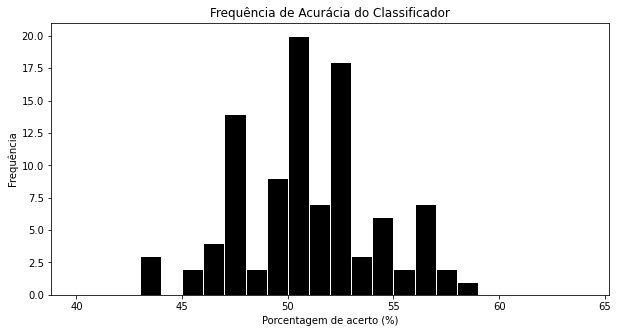

In [380]:
faixa=np.arange(40,65,1)
plt.figure(figsize=(10, 5))
plt.hist(l_histograma, bins=faixa,color='black', edgecolor='white', density=False)
plt.title('Frequência de Acurácia do Classificador')
plt.ylabel('Frequência')
plt.xlabel('Porcentagem de acerto (%)')
plt.show()

In [439]:

print('Acurácia máxima: ', round(max(l_histograma), 2))
print('Acurácia mínima: ', round(min(l_histograma), 2))
print('Acurácia média: ', round(sum(l_histograma)/len(l_histograma), 2))
ordem=(sorted(l_histograma,key=int))
print('Acurácia mediana: ', round((ordem[49]+ordem[50])/2, 2))

Acurácia máxima:  60.93
Acurácia mínima:  41.06
Acurácia média:  51.2
Acurácia mediana:  50.99


Com o histograma acima e com a impressão de algumas medidas-resumo, é possivel perceber uma distribuição aproximadamente simétrica, dado que o valor máximo e o valor mínimo estão na mesa distância do valor médio, além da mediana ser aproximadamente igual ao valor médio.
Além disso, é visível que a mudança na distruibuição dos tweets alterou o valor da acurácia, logo cabe ao desenvolvedor recolher dados que estejam adequados ao interesse, sem buscar inviesar os dados.
    

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* ok! IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* ok! CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* notok! CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* ok! FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**